In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from tensorflow import set_random_seed
set_random_seed(42)
np.random.seed(42)

In [3]:
from sklearn.model_selection import train_test_split
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout
from tensorflow.python.keras.callbacks import ModelCheckpoint

In [4]:
train = pd.read_csv('fashion-mnist_train.csv')

In [5]:
test = pd.read_csv('fashion-mnist_test.csv')

In [6]:
train.shape, test.shape

((60000, 785), (10000, 785))

In [7]:
x_train = train.drop('label', axis=1)/255
y_train = train.label
x_test = test.drop('label', axis=1)/255
y_test = test.label

In [8]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

In [9]:
y_train_labels = enc.fit_transform(np.reshape(np.array(y_train), (-1,1))).toarray()
y_test_labels = enc.transform(np.reshape(np.array(y_test), (-1,1))).toarray()

C:\Users\ASH-PC\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


### Разделим нашу выборку на тестовую и валидационную

In [10]:
x_TRAIN, x_VALID, y_TRAIN, y_VALID = train_test_split(x_train, y_train_labels, test_size = 0.2, random_state=42)

__1. Логистическая регрессия__

#### Реализуем логистическую регрессию с использованием стохастического градиентного спуска в качестве алгоритма оптимизации.

In [11]:
log_checkpoint = ModelCheckpoint('log_model.h5', save_best_only=True, save_weights_only=True, mode='max', monitor='val_acc')
model_log = Sequential()
model_log.add(Dense(10, input_shape=(784,), activation='softmax'))
model_log.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])        
history = model_log.fit(x_TRAIN.values, y_TRAIN, batch_size=500, validation_data=(x_VALID.values, y_VALID),
                       callbacks=[log_checkpoint], epochs=20)

Instructions for updating:
Colocations handled automatically by placer.
Train on 48000 samples, validate on 12000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
48000/48000 [==============================] - 2s 38us/sample - loss: 1.6856 - acc: 0.5036 - val_loss: 1.3423 - val_acc: 0.6408
Epoch 2/20
48000/48000 [==============================] - 1s 30us/sample - loss: 1.2006 - acc: 0.6622 - val_loss: 1.0917 - val_acc: 0.6812
Epoch 3/20
48000/48000 [==============================] - 2s 32us/sample - loss: 1.0281 - acc: 0.6885 - val_loss: 0.9738 - val_acc: 0.7028
Epoch 4/20
48000/48000 [==============================] - 2s 34us/sample - loss: 0.9360 - acc: 0.7084 - val_loss: 0.9023 - val_acc: 0.7177
Epoch 5/20
48000/48000 [==============================] - 1s 30us/sample - loss: 0.8766 - acc: 0.7219 - val_loss: 0.8538 - val_acc: 0.7278
Epoch 6/20
48000/48000 [==============================] - 2s 31us/sample - loss: 0.8339 - acc: 0.7363 - val_loss: 0.8166 - val_acc: 0.7

#### Визуализация зависимости accuracy от количества эпох.

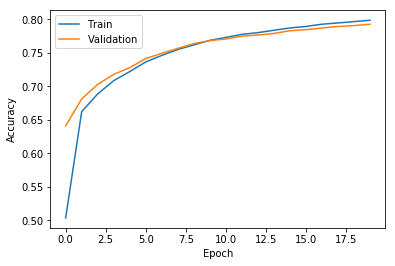

In [12]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

In [13]:
model_log.load_weights('log_model.h5')
_, score = model_log.evaluate(x_test.values, y_test_labels)
print("Логистическая регрессия   accuracy: {0:.3f}".format(score))

10000/10000 [==============================] - 0s 26us/sample - loss: 0.6359 - acc: 0.8000
Логистическая регрессия   accuracy: 0.800


__2. Полносвязная нейронная сеть__

In [14]:
nn_checkpoint = ModelCheckpoint('nn_model.h5', save_best_only=True, save_weights_only=True, mode='max', monitor='val_acc')
model_nn = Sequential()
model_nn.add(Dense(512, activation='relu', input_shape=(784,)))
model_nn.add(Dropout(0.2))
model_nn.add(Dense(512, activation='relu'))
model_nn.add(Dropout(0.2))
model_nn.add(Dense(10, activation='softmax'))

model_nn.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy'])

history_nn = model_nn.fit(x_TRAIN.values, y_TRAIN, batch_size=500, validation_data=(x_VALID.values, y_VALID),
                       callbacks=[nn_checkpoint], epochs=20)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 6s 127us/sample - loss: 0.8009 - acc: 0.7134 - val_loss: 0.5381 - val_acc: 0.7980
Epoch 2/20
48000/48000 [==============================] - 5s 103us/sample - loss: 0.5227 - acc: 0.8074 - val_loss: 0.4618 - val_acc: 0.8253
Epoch 3/20
48000/48000 [==============================] - 6s 115us/sample - loss: 0.4598 - acc: 0.8301 - val_loss: 0.4165 - val_acc: 0.8461
Epoch 4/20
48000/48000 [==============================] - 5s 100us/sample - loss: 0.4185 - acc: 0.8459 - val_loss: 0.4060 - val_acc: 0.8489
Epoch 5/20
48000/48000 [==============================] - 5s 114us/sample - loss: 0.3941 - acc: 0.8541 - val_loss: 0.4014 - val_acc: 0.8451
Epoch 6/20
48000/48000 [==============================] - 5s 108us/sample - loss: 0.3750 - acc: 0.8620 - val_loss: 0.3675 - val_acc: 0.

#### Визуализация зависимости accuracy от количества эпох.

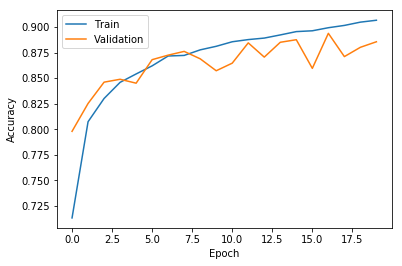

In [15]:
plt.plot(history_nn.history['acc'])
plt.plot(history_nn.history['val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

In [16]:
model_nn.load_weights('nn_model.h5')
_, score = model_nn.evaluate(x_test.values, y_test_labels)
print("Полносвязная нейронная сеть   accuracy: {0:.3f}".format(score))

10000/10000 [==============================] - 1s 64us/sample - loss: 0.2870 - acc: 0.8951
Полносвязная нейронная сеть   accuracy: 0.895


#### По результатам оценок двух моделей видно что полносвязная нейронная сеть в силу своей сложности по отношению к логистической регрессии показала лучший Score

__3. Сверточная нейронная сеть__

In [17]:
x_TRAIN_reshaped = x_TRAIN.values.reshape(48000, 28, 28, 1)
x_VALID_reshaped = x_VALID.values.reshape(12000, 28, 28, 1)
x_TEST_reshaped = x_test.values.reshape(10000, 28, 28, 1)

In [18]:
cnn_1_checkpoint = ModelCheckpoint('cnn1_model.h5', save_best_only=True, save_weights_only=True, mode='max', monitor='val_acc')
model_cnn_1 = tf.keras.models.Sequential()
model_cnn_1.add(tf.keras.layers.Convolution2D(32, (3,3), input_shape=(28, 28, 1), activation='relu'))
model_cnn_1.add(tf.keras.layers.MaxPooling2D((2,2)))
model_cnn_1.add(tf.keras.layers.Convolution2D(64, (3,3), activation='relu'))
model_cnn_1.add(tf.keras.layers.MaxPooling2D((2,2)))
model_cnn_1.add(tf.keras.layers.Flatten())
model_cnn_1.add(tf.keras.layers.Dense(64, activation='relu'))
model_cnn_1.add(tf.keras.layers.Dense(10, activation='softmax'))

model_cnn_1.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy'])

history_cnn1 = model_cnn_1.fit(x_TRAIN_reshaped, y_TRAIN, batch_size=500, validation_data=(x_VALID_reshaped, y_VALID),
                       callbacks=[cnn_1_checkpoint], epochs=10)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 24s 510us/sample - loss: 0.9929 - acc: 0.6453 - val_loss: 0.5665 - val_acc: 0.7812
Epoch 2/10
48000/48000 [==============================] - 23s 485us/sample - loss: 0.5443 - acc: 0.7957 - val_loss: 0.4921 - val_acc: 0.8225
Epoch 3/10
48000/48000 [==============================] - 23s 489us/sample - loss: 0.4722 - acc: 0.8272 - val_loss: 0.4756 - val_acc: 0.8143
Epoch 4/10
48000/48000 [==============================] - 24s 494us/sample - loss: 0.4277 - acc: 0.8440 - val_loss: 0.3935 - val_acc: 0.8595
Epoch 5/10
48000/48000 [==============================] - 24s 510us/sample - loss: 0.3951 - acc: 0.8557 - val_loss: 0.3907 - val_acc: 0.8609
Epoch 6/10
48000/48000 [==============================] - 24s 502us/sample - loss: 0.3685 - acc: 0.8668 - val_loss: 0.3698 - val_acc: 0.8674
Epoch 7/10
48000/48000 [==============================] - 25s 523us/sample - loss: 0.3496 - acc: 0.8716 

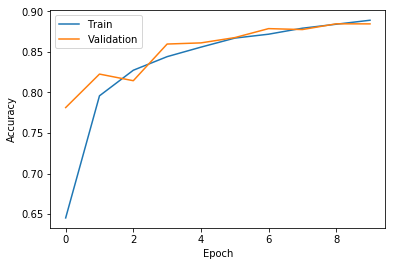

In [19]:
plt.plot(history_cnn1.history['acc'])
plt.plot(history_cnn1.history['val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

In [20]:
model_cnn_1.load_weights('cnn1_model.h5')
_, score = model_cnn_1.evaluate(x_TEST_reshaped, y_test_labels)
print("Сверточная нейронная сеть-1   accuracy: {0:.3f}".format(score))

10000/10000 [==============================] - 2s 186us/sample - loss: 0.3086 - acc: 0.8918
Сверточная нейронная сеть-1   accuracy: 0.892


#### Тут уже сверточная нейронная сеть проявила себя лучше с помощью 10-ти эпох!

In [21]:
cnn_2_checkpoint = ModelCheckpoint('cnn2_model.h5', save_best_only=True, save_weights_only=True, mode='max', monitor='val_acc')
model_cnn_2 = tf.keras.models.Sequential()
model_cnn_2.add(tf.keras.layers.Convolution2D(32, (3,3), input_shape=(28, 28, 1), activation='relu'))
model_cnn_2.add(tf.keras.layers.Convolution2D(32, (3,3), activation='relu'))
model_cnn_2.add(tf.keras.layers.MaxPooling2D((2,2)))
model_cnn_2.add(tf.keras.layers.Convolution2D(64, (3,3), activation='relu'))
model_cnn_2.add(tf.keras.layers.Convolution2D(64, (3,3), activation='relu'))
model_cnn_2.add(tf.keras.layers.MaxPooling2D((2,2)))
model_cnn_2.add(tf.keras.layers.Flatten())
model_cnn_2.add(tf.keras.layers.Dense(128, activation='relu'))
model_cnn_2.add(tf.keras.layers.Dense(64, activation='relu'))
model_cnn_2.add(tf.keras.layers.Dense(10, activation='softmax'))

model_cnn_2.compile(optimizer='adadelta',loss='categorical_crossentropy', metrics=['accuracy'])
    
history_cnn2 = model_cnn_2.fit(x_TRAIN_reshaped, y_TRAIN, batch_size=500, validation_data=(x_VALID_reshaped, y_VALID),
                       callbacks=[cnn_2_checkpoint], epochs=10)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 48s 1ms/sample - loss: 1.1409 - acc: 0.5814 - val_loss: 0.6926 - val_acc: 0.7442
Epoch 2/10
48000/48000 [==============================] - 47s 976us/sample - loss: 0.5814 - acc: 0.7779 - val_loss: 0.4819 - val_acc: 0.8243
Epoch 3/10
48000/48000 [==============================] - 46s 960us/sample - loss: 0.4837 - acc: 0.8209 - val_loss: 0.5342 - val_acc: 0.7883
Epoch 4/10
48000/48000 [==============================] - 48s 994us/sample - loss: 0.4110 - acc: 0.8477 - val_loss: 0.4191 - val_acc: 0.8423
Epoch 5/10
48000/48000 [==============================] - 47s 984us/sample - loss: 0.3653 - acc: 0.8649 - val_loss: 0.3428 - val_acc: 0.8759
Epoch 6/10
48000/48000 [==============================] - 48s 995us/sample - loss: 0.3318 - acc: 0.8769 - val_loss: 0.3220 - val_acc: 0.8804
Epoch 7/10
48000/48000 [==============================] - 47s 984us/sample - loss: 0.3048 - acc: 0.8862 - 

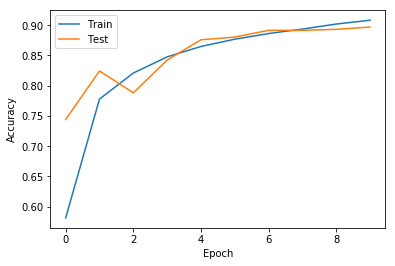

In [22]:
plt.plot(history_cnn2.history['acc'])
plt.plot(history_cnn2.history['val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

In [23]:
model_cnn_2.load_weights('cnn2_model.h5')
_, score = model_cnn_2.evaluate(x_TEST_reshaped, y_test_labels)
print("Сверточная нейронная сеть-2   accuracy: {0:.3f}".format(score))

10000/10000 [==============================] - 5s 476us/sample - loss: 0.2714 - acc: 0.8972s - loss: 
Сверточная нейронная сеть-2   accuracy: 0.897


#### После добавления допольнительных слоев в сверточную нейросеть результат незначительно улучшился

### Добавление Batch Normalization слоев

In [24]:
cnn_3_checkpoint = ModelCheckpoint('cnn3_model.h5', save_best_only=True, save_weights_only=True, mode='max', monitor='val_acc')
model_cnn_3b = tf.keras.models.Sequential()
model_cnn_3b.add(tf.keras.layers.Convolution2D(32, (3,3), input_shape=(28, 28, 1), activation='relu'))
model_cnn_3b.add(tf.keras.layers.BatchNormalization())
model_cnn_3b.add(tf.keras.layers.Convolution2D(32, (3,3), activation='relu'))
model_cnn_3b.add(tf.keras.layers.BatchNormalization())
model_cnn_3b.add(tf.keras.layers.MaxPooling2D((2,2)))
model_cnn_3b.add(tf.keras.layers.Convolution2D(64, (3,3), activation='relu'))
model_cnn_3b.add(tf.keras.layers.BatchNormalization())
model_cnn_3b.add(tf.keras.layers.Convolution2D(64, (3,3), activation='relu'))
model_cnn_3b.add(tf.keras.layers.BatchNormalization())
model_cnn_3b.add(tf.keras.layers.MaxPooling2D((2,2)))
model_cnn_3b.add(tf.keras.layers.Flatten())
model_cnn_3b.add(tf.keras.layers.Dense(128, activation='relu'))
model_cnn_3b.add(tf.keras.layers.Dense(32, activation='relu'))
model_cnn_3b.add(tf.keras.layers.Dense(10, activation='softmax'))

model_cnn_3b.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
    
history_cnn3 = model_cnn_3b.fit(x_TRAIN_reshaped, y_TRAIN, batch_size=500, validation_data=(x_VALID_reshaped, y_VALID),
                       callbacks=[cnn_3_checkpoint], epochs=10)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 104s 2ms/sample - loss: 0.5733 - acc: 0.8024 - val_loss: 2.6973 - val_acc: 0.1447
Epoch 2/10
48000/48000 [==============================] - 103s 2ms/sample - loss: 0.2960 - acc: 0.8934 - val_loss: 3.4260 - val_acc: 0.2144
Epoch 3/10
48000/48000 [==============================] - 103s 2ms/sample - loss: 0.2404 - acc: 0.9132 - val_loss: 3.7993 - val_acc: 0.2742
Epoch 4/10
48000/48000 [==============================] - 100s 2ms/sample - loss: 0.2011 - acc: 0.9276 - val_loss: 2.9085 - val_acc: 0.4022
Epoch 5/10
48000/48000 [==============================] - 101s 2ms/sample - loss: 0.1775 - acc: 0.9350 - val_loss: 1.3133 - val_acc: 0.6375
Epoch 6/10
48000/48000 [==============================] - 100s 2ms/sample - loss: 0.1430 - acc: 0.9497 - val_loss: 0.7179 - val_acc: 0.8077
Epoch 7/10
48000/48000 [==============================] - 101s 2ms/sample - loss: 0.1221 - acc: 0.9567 - val_l

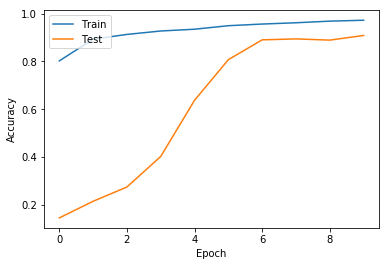

In [25]:
plt.plot(history_cnn3.history['acc'])
plt.plot(history_cnn3.history['val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

In [26]:
model_cnn_3b.load_weights('cnn3_model.h5')
_, score = model_cnn_3b.evaluate(x_TEST_reshaped, y_test_labels)
print("Сверточная нейронная сеть-3   accuracy: {0:.3f}".format(score))

10000/10000 [==============================] - 9s 950us/sample - loss: 0.2889 - acc: 0.9121s - loss: 0.2
Сверточная нейронная сеть-3   accuracy: 0.912


### После добавления batch normalization слоёв наш результат улучшился. 

### Тем не менее полученный по итогам обучения на 10-ти эпохах результат нельзя считать оптимальным.

### Если увеличить количество эпох, результат должен стать еще лучше.